## Cancer Classification
 
 ### Problem Statement
 
 A health facility has been experiencing alot of deaths due to cancer with a few survivors. They are looking for ways to integrate machine learning into their systems to help them catch cancerous cells and detect if it is begnin /malignant

 ### Approach
 - Examine the possibility of predicting malignity of cancer by building a classification model using past data .

 - The model should be able to correctly predict malignant cases.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
df = pd.read_csv('cancer dataset.csv', sep = ';')

## Data Profiling

In [17]:
df.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,begnin
1,1,5,8,6,5,8,7,10,1,malignant
2,3,2,2,3,2,1,1,1,1,begnin
3,3,1,1,3,8,1,5,8,1,begnin
4,10,4,6,1,2,10,5,3,1,malignant


In [20]:
df.columns

Index(['clump', 'ucellsize', 'ucellshape', 'mgadhesion', 'sepics', 'bnuclei',
       'bchromatin', 'normnucl', 'mitoses', 'classe'],
      dtype='object')

In [22]:
df.shape

(300, 10)

There are nine possible features/inputs.
The outcome is called a label or target variable.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       300 non-null    int64 
 1   ucellsize   300 non-null    int64 
 2   ucellshape  300 non-null    int64 
 3   mgadhesion  300 non-null    int64 
 4   sepics      300 non-null    int64 
 5   bnuclei     300 non-null    int64 
 6   bchromatin  300 non-null    int64 
 7   normnucl    300 non-null    int64 
 8   mitoses     300 non-null    int64 
 9   classe      300 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.6+ KB


### Data Cleaning

In [24]:
df.isnull().sum()

clump         0
ucellsize     0
ucellshape    0
mgadhesion    0
sepics        0
bnuclei       0
bchromatin    0
normnucl      0
mitoses       0
classe        0
dtype: int64

In [25]:
df.duplicated().sum()

88

### Class Imbalance -used to check the value count of the label/ target variable

In [26]:
df.classe.value_counts()

classe
begnin       199
malignant    101
Name: count, dtype: int64

### Feature Selection - for selling the best features for your model

In [ ]:
x= df.drop('classe', axis=1) #features 
y= df.classe      #outcome/label

In [28]:
x.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
0,4,1,1,1,2,3,1,1,1
1,1,5,8,6,5,8,7,10,1
2,3,2,2,3,2,1,1,1,1
3,3,1,1,3,8,1,5,8,1
4,10,4,6,1,2,10,5,3,1


In [29]:
x.describe()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4.436667,3.053333,3.216667,2.653333,3.236667,3.470000,3.360000,2.860000,1.616667
std,2.820017,2.997851,3.008859,2.710037,2.205342,3.561561,2.404789,3.114386,1.800146
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<Axes: >

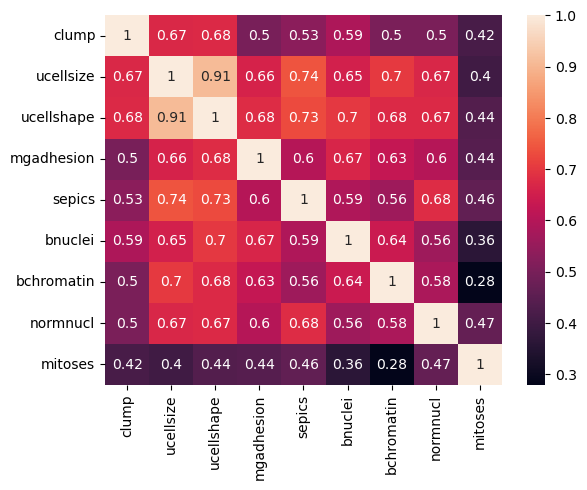

In [ ]:
import seaborn as sb
sb.heatmap(x.corr(), annot=True)   #annot adds the correlation on the cells

The features that do not have high correlation with each other: bchromatin , mitoses,bnuclei,normnuclei

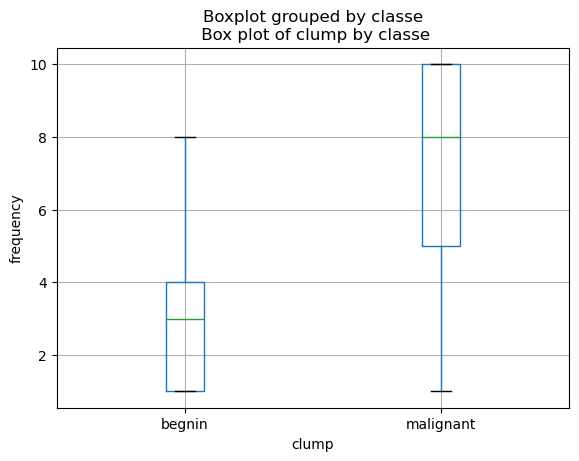

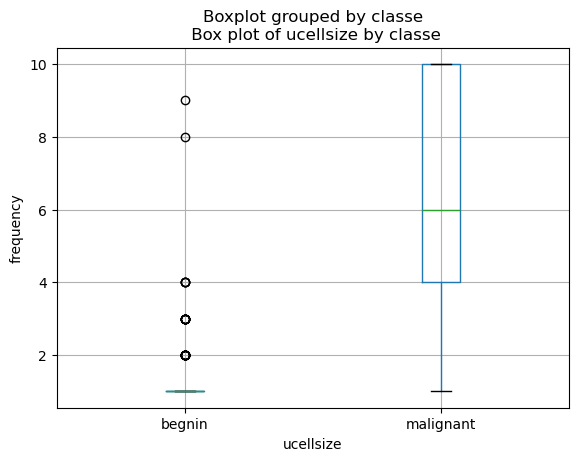

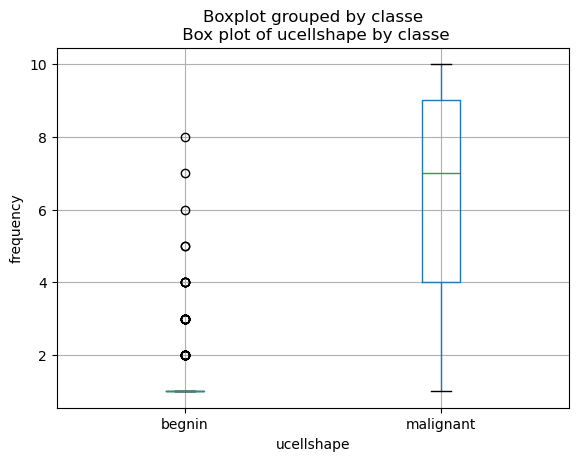

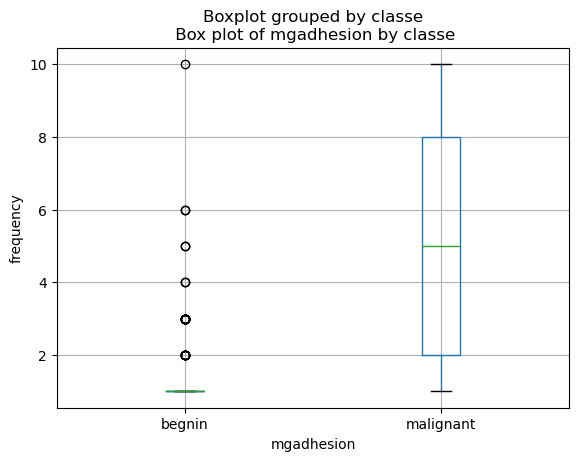

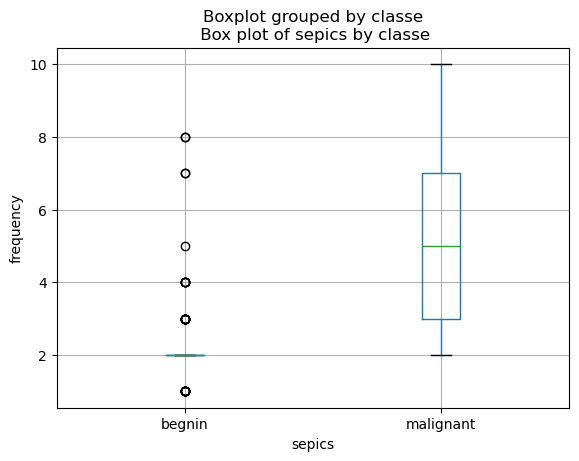

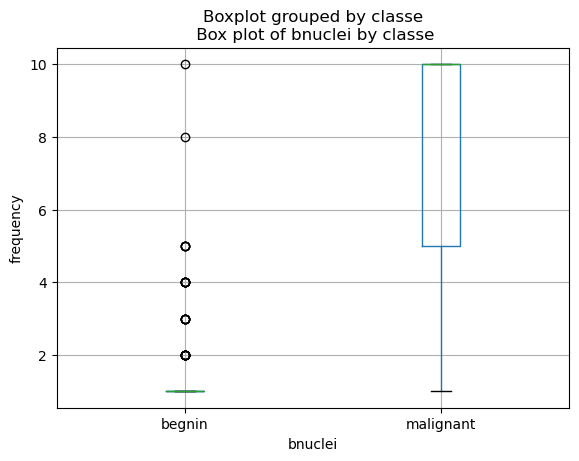

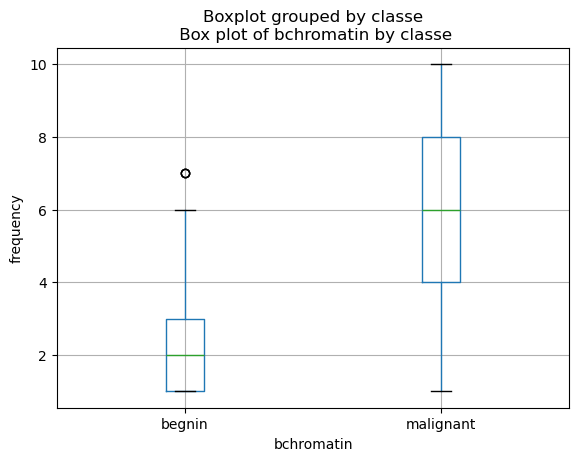

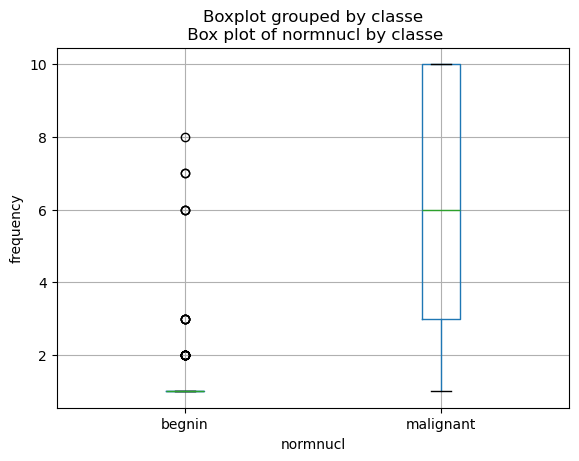

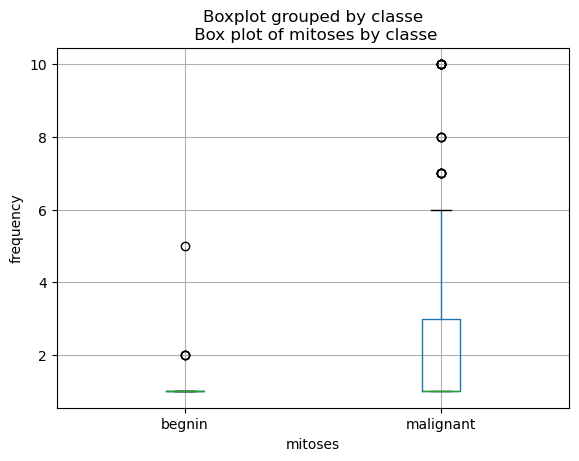

In [33]:
for column in x.columns:
    df.boxplot(column=column, by='classe')
    plt.title(f' Box plot of {column} by classe')
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()


The Features-mitosis, normnuclei, bnuclei, mgadhesion,ucellshape and ucellsize

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs= SelectKBest(score_func=f_classif, k=5)
x_selected = fs.fit_transform(x,y)

In [37]:
cols_id = fs.get_support()
cols_id

array([ True,  True,  True, False, False,  True,  True, False, False])

In [38]:
x.columns

Index(['clump', 'ucellsize', 'ucellshape', 'mgadhesion', 'sepics', 'bnuclei',
       'bchromatin', 'normnucl', 'mitoses'],
      dtype='object')

In [42]:
#model encoding
df['classe'] = df['classe'].replace({'begnin' : 0, 'malignant' : 1})
y = df.classe
y

C:\Users\user\AppData\Local\Temp\ipykernel_8464\1325466239.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['classe'] = df['classe'].replace({'begnin' : 0, 'malignant' : 1})


0      0
1      1
2      0
3      0
4      1
      ..
295    0
296    0
297    0
298    1
299    0
Name: classe, Length: 300, dtype: int64

column selected: clump, ucellsize, ucellshape, bnuclei and  bchromatin

### Model Building

In [47]:
#split the data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=46)

In [48]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()

model_log.fit(x_train, y_train)

LogisticRegression()

In [49]:
#Evaluations

predictions = model_log.predict(x_test)
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score

print(f'Accuracy_score {accuracy_score(y_test, predictions)}')

Accuracy_score 0.9833333333333333
